 # Курсовая работа
 
 ## Выполнил студент группы БВТ2105 Осипов Егор

## Задание:

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу 
| Общая стоимость |

Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.

Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями.

In [23]:
import csv
import re
import random

import numpy as np
import matplotlib.pyplot as plt

name = 'table.csv'

In [11]:
# Быстрая сортировка по категориям товаров
def quick_sort(array, category):
    if len(array) < 2:
        return array

    low, same, high = [], [], []

    rand = random.choice(array)

    for item in array:
        if item[category] < rand[category]:
            low.append(item)
        elif item[category] == rand[category]:
            same.append(item)
        elif item[category] > rand[category]:
            high.append(item)

    return quick_sort(low, category) + same + quick_sort(high, category)

In [12]:
# Бинарный поиск по названиям товаров
def binary_searching (arr, category, searching_value):
    # Устанавливаем границы поиска, за левую принимаем начало массива, за правую - конец, а так же запоминаем
    # середину массива
    left = 0
    right = len(arr) - 1
    mid = (left + right) // 2
    # Запускаем цикл поиска элемента в массиве, идём до тех пор, пока либо не найдём искомый элемент, либо массив не
    # закончится. Дальше смотрим в какую половину попал искомый элемент,и в зависимости от этого сдвигаем границы,
    # в конце перезаписываем середину массива.
    while arr[mid][category] != searching_value and left <= right:
        if searching_value > arr[mid][category]:
            left = mid + 1
        else:
            right = mid - 1
        mid = (left + right) // 2
    if left > right:
        return None
    else:
        return mid

In [13]:
# Функция чтения csv файлов с проверкой формата файла и данных, а также общей стоимости товара

def read(name):
    arr = []
    if name.endswith('.csv'):
        with open(name, newline = '') as csvfile:
            reader = csv.DictReader(csvfile, delimiter = ';')
            for row in reader:
                arr.append(row)
    else:
        print('Неверный формат файла')
        return []
    for i in range(len(arr)):
        if (not re.fullmatch(r'\d\d\d\d', arr[i]['Номер заказа']) or
            not re.fullmatch(r'[0-3][0-9][.][0-1][0-9][.][0-9][0-9][0-9][0-9]', arr[i]['Дата заказа']) or
            not arr[i]['Категория товара'].replace(' ', '').isalpha() or
            not arr[i]['Количество продаж'].isdigit() or
            not arr[i]['Цена за единицу'].isdigit() or
            not arr[i]['Общая стоимость'].isdigit()
           ):

            print("Неверный формат данных")
            return []

        if (int(arr[i]['Количество продаж']) * int(arr[i]['Цена за единицу']) != int(arr[i]['Общая стоимость'])):
            print("Некорректный расчёт общей стоимости товара")
            return arr[i]['Название товара']

    return arr

print(read('table.csv'))

[{'Номер заказа': '4001', 'Дата заказа': '01.02.2022', 'Название товара': 'Apple iPhone 14', 'Категория товара': 'Смартфоны', 'Количество продаж': '500', 'Цена за единицу': '89990', 'Общая стоимость': '44995000'}, {'Номер заказа': '4002', 'Дата заказа': '02.04.2022', 'Название товара': 'Samsung Galaxy S22 Ultra', 'Категория товара': 'Смартфоны', 'Количество продаж': '300', 'Цена за единицу': '99990', 'Общая стоимость': '29997000'}, {'Номер заказа': '4003', 'Дата заказа': '03.01.2022', 'Название товара': 'Игровые приставки', 'Категория товара': 'Игровые приставки', 'Количество продаж': '200', 'Цена за единицу': '59990', 'Общая стоимость': '11998000'}, {'Номер заказа': '4004', 'Дата заказа': '04.02.2022', 'Название товара': 'LG OLED TV', 'Категория товара': 'Телевизоры', 'Количество продаж': '150', 'Цена за единицу': '179990', 'Общая стоимость': '26998500'}, {'Номер заказа': '4005', 'Дата заказа': '05.05.2022', 'Название товара': 'Apple MacBook Pro 16', 'Категория товара': 'Ноутбуки', 'К

In [14]:
# Задание №1

# Функция подсчёта общей выручки магазина за продажу всех товаров
def total_revenue(name):
    summ = 0
    for a in read(name):
        summ += int(a['Общая стоимость'])
    return summ

print(total_revenue('table.csv'))

241969500


In [15]:
# Задание №2, 3

# Функция поиска товаров с максимальным показателем по выбраной категории
def biggest(name, category):
    dic = {}
    max_value = 0
    result = []


    for a in read(name):
        dic[a['Название товара']] = a[category]

    for m in dic.values():
        if int(m) >= max_value:
            max_value = int(m)

    for k in dic:
        if int(dic[k]) == max_value:
            result.append(k)

    return result

print("Товар, который был продан наибольшее количество раз:")
print(biggest('table.csv','Количество продаж'))
print("Товар, который принес наибольшую выручку:")
print(biggest('table.csv','Общая стоимость'))
print(biggest('table.csv','Цена за единицу'))

Товар, который был продан наибольшее количество раз:
['Apple iPhone 14', 'Philips Hue Smart Bulbs']
Товар, который принес наибольшую выручку:
['Apple iPhone 14']
['DJI Ronin 4D']


In [16]:
# Функция для подчёта доли общей выручки товара от общей выручки магазина

def fraction(name, category, order):
    revenue = total_revenue(name)
    a = quick_sort(read(name), category)
    i = binary_searching(a, category, order)
    return round(int(a[i]['Общая стоимость']) / revenue, 5)

print(fraction('table.csv', 'Название товара', 'Philips Hue Smart Bulbs'))

0.00618


In [17]:
# Задание №4

# Функция выводящая общий отчёт по статистике магазина
def report(name):
    print("Отчёт по документу статистики \"" + name.replace(".csv", '') + "\"\n")
    print("Общая выручка магазина:\t" + str(total_revenue(name)) + "\n")
    for a in read(name):
        print("Товар: \"" + a['Название товара'] + "\"; был продан в количестве: " + a['Количество продаж'] +
            "; его доля от общей выручки составила: " + str(fraction(name, 'Название товара', a['Название товара'])) + "\n")
    return "Конец отчёта"

print(report('table.csv'))

Отчёт по документу статистики "table"

Общая выручка магазина:	241969500

Товар: "Apple iPhone 14"; был продан в количестве: 500; его доля от общей выручки составила: 0.18595

Товар: "Samsung Galaxy S22 Ultra"; был продан в количестве: 300; его доля от общей выручки составила: 0.12397

Товар: "Игровые приставки"; был продан в количестве: 200; его доля от общей выручки составила: 0.04958

Товар: "LG OLED TV"; был продан в количестве: 150; его доля от общей выручки составила: 0.11158

Товар: "Apple MacBook Pro 16"; был продан в количестве: 100; его доля от общей выручки составила: 0.08265

Товар: "Canon EOS R7"; был продан в количестве: 50; его доля от общей выручки составила: 0.05166

Товар: "Bose QuietComfort 55"; был продан в количестве: 100; его доля от общей выручки составила: 0.01446

Товар: "Samsung Galaxy Tab S8"; был продан в количестве: 75; его доля от общей выручки составила: 0.02169

Товар: "DJI Mavic 3"; был продан в количестве: 25; его доля от общей выручки составила: 0.015

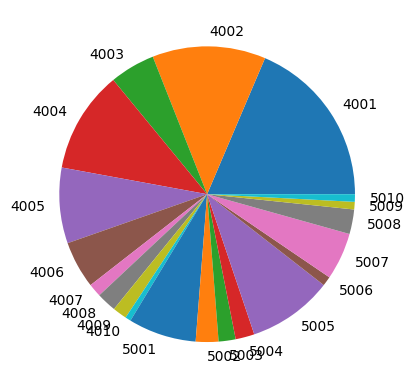

None


In [29]:
def dygrum(name):
    a_fraction = []
    a_id = []
    for row in read(name):
        a_fraction.append(fraction(name, 'Номер заказа', row['Номер заказа']))
        a_id.append(row['Номер заказа'])
    
    plt.pie(a_fraction, labels=a_id)
    plt.show()
    
print(dygrum('table.csv'))